### Importing the necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the provided Uber Request Data set

In [3]:
uber_df = pd.read_csv("C:\\Users\\sravi35\\OneDrive\\Personal\\IIITB\\Uber Supply-Demand Gap\\Uber Request Data.csv")

In [4]:
uber_df.shape

(6745, 6)

In [5]:
uber_df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
uber_df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [7]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


## Data Cleaning and Preparation
### Dropping the Column of Request id as it is not important for the analysis

In [8]:
uber_df.drop(columns='Request id', axis=1, inplace=True)
uber_df.columns

Index(['Pickup point', 'Driver id', 'Status', 'Request timestamp',
       'Drop timestamp'],
      dtype='object')

### Converting the Data type of Request timestamp and Drop timestamp to DateTime

In [9]:
uber_df['Request timestamp'] = pd.to_datetime(uber_df['Request timestamp'], dayfirst= True)
uber_df['Request timestamp'].head()

0   2016-07-11 11:51:00
1   2016-07-11 17:57:00
2   2016-07-12 09:17:00
3   2016-07-12 21:08:00
4   2016-07-13 08:33:16
Name: Request timestamp, dtype: datetime64[ns]

In [10]:
uber_df['Drop timestamp'] = pd.to_datetime(uber_df['Drop timestamp'], dayfirst= True)
uber_df['Drop timestamp'].head()

0   2016-07-11 13:00:00
1   2016-07-11 18:47:00
2   2016-07-12 09:58:00
3   2016-07-12 22:03:00
4   2016-07-13 09:25:47
Name: Drop timestamp, dtype: datetime64[ns]

In [11]:
#Verifying the first and last Drop timestamp of the data set
print(uber_df['Request timestamp'].min())
print(uber_df['Request timestamp'].max())

2016-07-11 00:00:00
2016-07-15 23:59:58


In [12]:
#Verifying the first and last Drop timestamp of the data set
print(uber_df['Drop timestamp'].min())
print(uber_df['Drop timestamp'].max())

2016-07-11 00:51:00
2016-07-16 01:09:24


In [13]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 263.6+ KB


## Deriving New Variables

### Extracting the Successful Trips and Unsuccessful Trips out of the Status field

In [14]:
Trip_Status = {'Cancelled' : 'Unsuccessful_Trip', 'No Cars Available' : 'Unsuccessful_Trip', 'Trip Completed' : 'Successful_Trip'}
uber_df['Trip_Status'] = uber_df['Status'].apply(lambda x : Trip_Status[x])

### Extracting the Hours out of the Request timestamp field

In [15]:
uber_df['Request hour'] = uber_df['Request timestamp'].apply(lambda x : x.hour)

### Extracting the Day out of the Request timestamp field

In [16]:
import datetime as dt
uber_df['day'] = uber_df[['Request timestamp']].apply(lambda x: dt.datetime.strftime(x['Request timestamp'], '%A'), axis=1)

# Results Expected

## 1. Visually identify the most pressing problems for Uber

In [17]:
uber_df['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [18]:
uber_df['Trip_Status'].value_counts()

Unsuccessful_Trip    3914
Successful_Trip      2831
Name: Trip_Status, dtype: int64

Text(0,0.5,'Count of Requests')

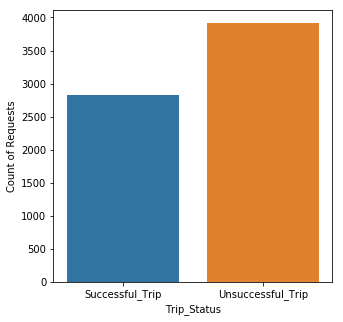

In [19]:
plt.figure(figsize= (5, 5))
#plt.subplot(121)
sns.countplot('Trip_Status', data=uber_df)
plt.ylabel('Count of Requests')
#pd.value_counts(uber_df['Trip_Status']).plot(kind="bar")
#plt.subplot(122)
#plt.ylabel('Percentage of Requets')
#percentage_of_requests.plot(kind="bar")

##### The above graphs clearly suggests that the Number of Unsuccessful Trips is way too greater than than the Successful Trips, which is Uber's biggest problem

In [20]:
#uber_df[uber_df['Trip_Status'] == 'Successful_Trip']
percentage_of_requests = round(100 * uber_df['Trip_Status'].value_counts()/len(uber_df['Trip_Status']))
percentage_of_requests

Unsuccessful_Trip    58.0
Successful_Trip      42.0
Name: Trip_Status, dtype: float64

##### Overall, only 42 Trips out of 100 requests are being successfully completed and the rest 58 are either getting cancelled by the driver or Cars are not available

##  Identify the most problematic types of requests (city to airport / airport to city etc.)

In [21]:
uber_df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Trip_Status,Request hour,day
0,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,Successful_Trip,11,Monday
1,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,Successful_Trip,17,Monday
2,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,Successful_Trip,9,Tuesday
3,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,Successful_Trip,21,Tuesday
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Successful_Trip,8,Wednesday


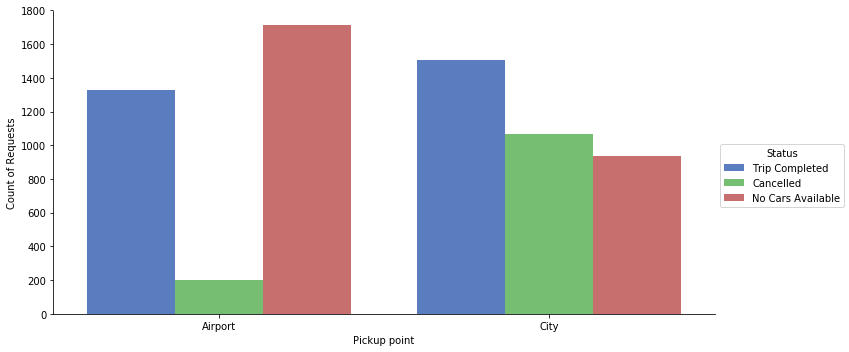

In [22]:
graph = sns.factorplot("Pickup point", data=uber_df, hue= 'Status', kind="count", size=5, aspect=2, palette="muted")
graph.set_ylabels('Count of Requests')

##### Accordingly, it is clear from the above graph that the Uber has lot many drivers cancelling the Airport Trips from City pick up point and high percentage of No Cars Available at Airport Pickup point

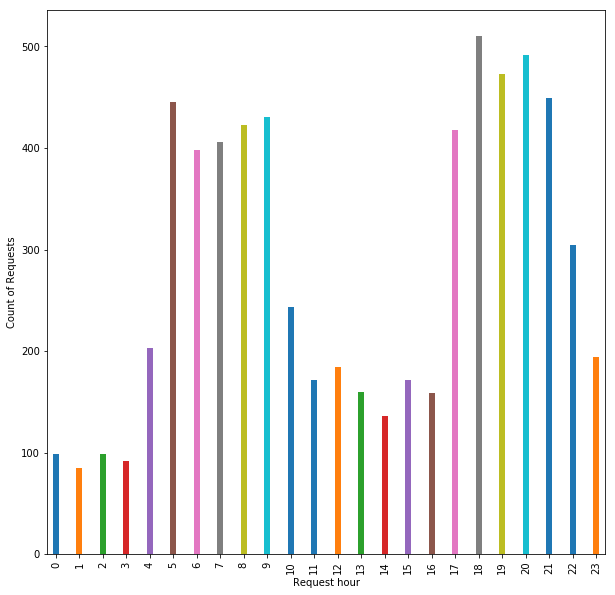

In [23]:
plt.figure(figsize=(10, 10))
plt.ylabel('Count of Requests')
uber_df.groupby('Request hour').Status.count().plot(kind='bar', width=0.25)

##### The above graph gives us the insight that the count of requests is high in the Mornings between 5 am to 10 am and 5pm to 11pm during the Evening-Night

### Creating the Bins to classify the total day into 4 slots to make better visualizations

In [24]:
uber_df['bin'] = pd.cut(uber_df['Request hour'], [-1, 4, 10, 16, 23], \
                        labels= ["MidNight-EarlyMorning", "Morning", "Before & After Noon", "Evening-Night"])

##### Below are the Time slot calssification considerations:
##### 12 AM till 5 AM -> MidNight - EarlyMorning
##### 5 AM till 11 AM -> Morning
#####  11 AM till 5 PM -> Before & After Noon
#####  5 PM till 12 AM -> Evening-Night

In [25]:
# Checking the bin series
uber_df['bin'].head()

0    Before & After Noon
1          Evening-Night
2                Morning
3          Evening-Night
4                Morning
Name: bin, dtype: category
Categories (4, object): [MidNight-EarlyMorning < Morning < Before & After Noon < Evening-Night]

## Find out the gap between supply and demand and show the same using plots.
### Find the time slots when the highest gap exists

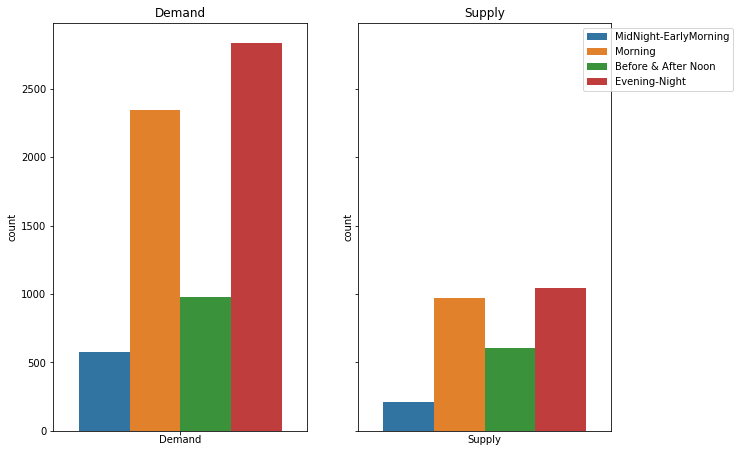

In [26]:
uber_df['Demand'] = 1
uber_df['Supply'] = uber_df.Status.apply(lambda x : 1 if x == 'Trip Completed' else None)
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(10,7.5))
ax1.set_title("Demand")
plt.xticks([])
sns.countplot('Demand', hue = 'bin', data=uber_df, ax=ax1).legend(bbox_to_anchor=(1.5, 1))
plt.xticks([])
ax2.set_title("Supply")
sns.countplot('Supply', hue = 'bin', data=uber_df, ax=ax2).legend(bbox_to_anchor=(1.5, 1))
plt.xticks([])
ax1.tick_params(axis='x', labelbottom=False)

##### The above graph is plotted just to know how the Counts of Demand and Supply vary and how huge the gap is!

#### Let us now, plot graphs of Supply and Supply-Gap

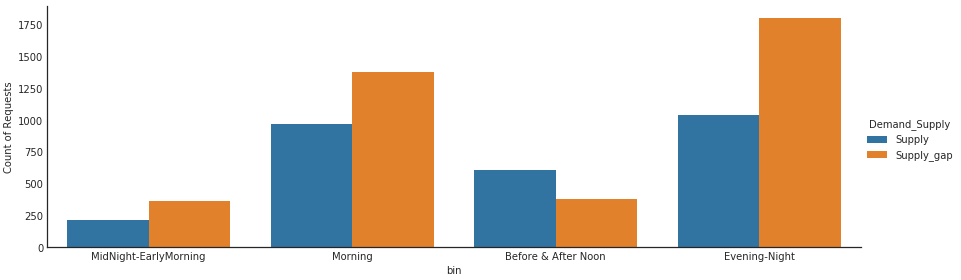

In [27]:
supply_gap = {'Successful_Trip' : 'Supply', 'Unsuccessful_Trip' : 'Supply_gap'}
uber_df['Demand_Supply'] = uber_df.Trip_Status.apply(lambda x : supply_gap[x])
with sns.axes_style('white'):
    graph = sns.factorplot("bin", data=uber_df, aspect=3.0, kind='count',
                       hue='Demand_Supply')
    graph.set_ylabels('Count of Requests')

  ##### The highest gap in Supply exists during the Evening-Night Time Slots. i.e, from 5 pm - 11 pm

### Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

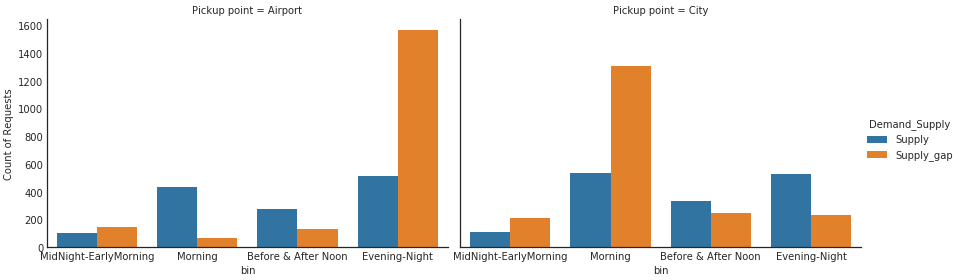

In [28]:
with sns.axes_style('white'):
    graph = sns.factorplot("bin", data=uber_df, aspect=1.5, kind='count',  col="Pickup point",
                       hue='Demand_Supply')
    graph.set_ylabels('Count of Requests')

##### From the above graph, it is clear that the Airport Pickup in the Evening-NIght slot (5 pm - 11 pm) is the most severe gap in the Supply to Demand
##### Also, we see a major gap in the City Pickup of Morning slot (5 am - 10 am)

##### It makes sense to drill down the Supply_gap to check why the Trip was unsuccessful - Is it due to 'No Cars available' or 'Driver Cancelled'

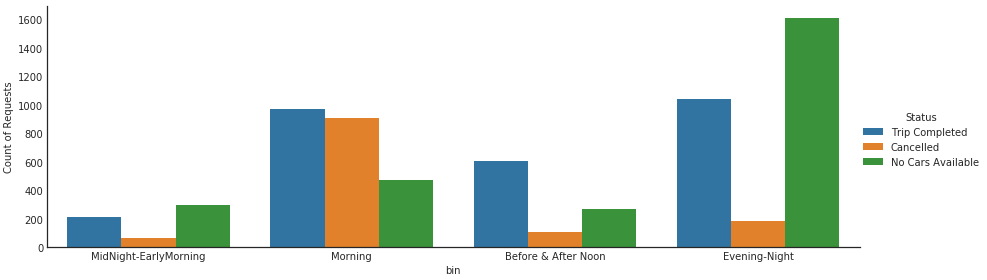

In [29]:
with sns.axes_style('white'):
    graph = sns.factorplot("bin", data=uber_df, aspect=3.0, kind='count',
                       hue='Status')
    graph.set_ylabels('Count of Requests')

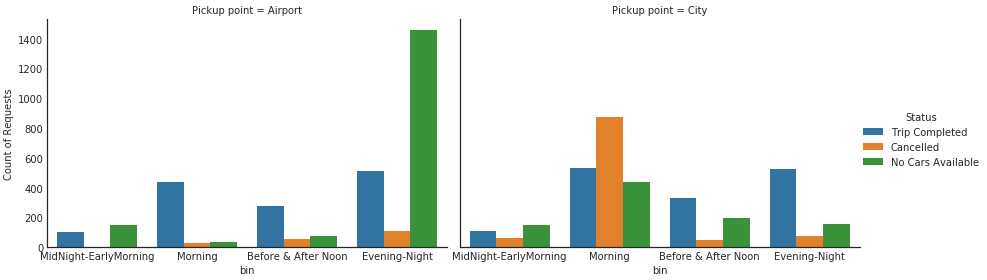

In [30]:
with sns.axes_style('white'):
    graph = sns.factorplot("bin", data=uber_df, aspect=1.5, kind='count',  col="Pickup point",
                       hue='Status')
    graph.set_ylabels('Count of Requests')

##### Accordingly, it is clear fromt the above two graphs that, Lot of 'No Cars available' during Evening-Night (due to the high percentage of requests made from Airport) and good number cancellations happen during morning time as high % of requests are made from city to airport and more likely they could come back to the City empty

### Kindly refer to the PPT for 3. Reason & 4. Recommendations

## Additional Analysis

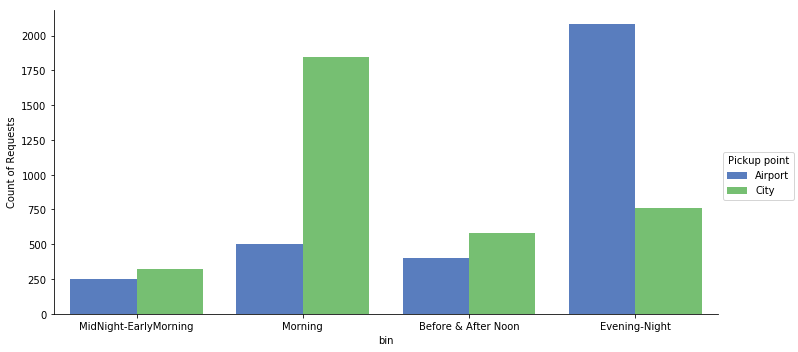

In [31]:
graph = sns.factorplot("bin", data=uber_df, hue= 'Pickup point', kind="count", size=5, aspect=2, palette="muted")
graph.set_ylabels('Count of Requests')

##### Time Slot demand from from Airport and City comaprison

##### Lot of requests coming from airport in the Evening-Night and from city during day time

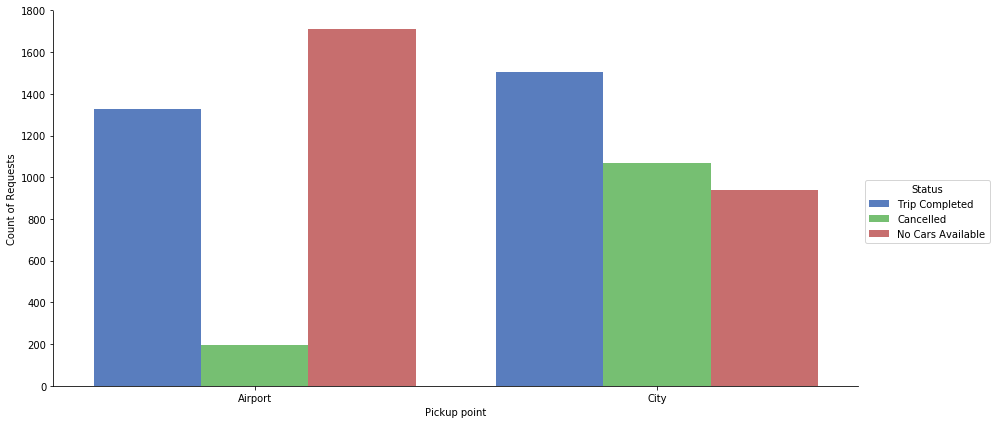

In [32]:
graph = sns.factorplot("Pickup point", data=uber_df, hue= 'Status', kind="count", size=6, aspect=2, palette="muted")
graph.set_ylabels('Count of Requests')

##### Pickup Points (Airport/City) - Status Analysis

##### More number of Cancellations are shown against the requests made from City and lot of No Cars available status shown against the requests made from Airport

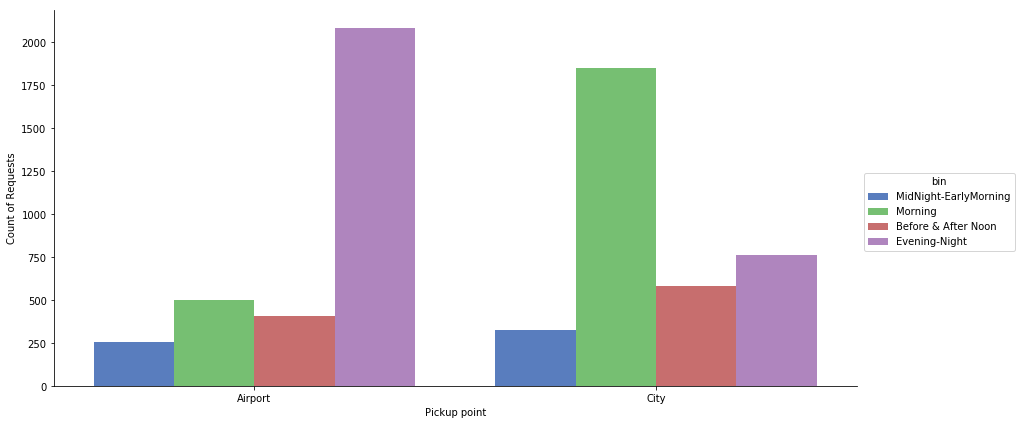

In [33]:
graph = sns.factorplot("Pickup point", data=uber_df, hue= 'bin', kind="count", size=6, aspect=2, palette="muted")
graph.set_ylabels('Count of Requests')

#####  Pickup Point -TimeSlots Analysis
##### The Requests made from the Airport is huge during Evening-Night suggests that lot of flights arrive to the airport during that time. 
##### The Requests made from the City is high during Morning hours suggests that lot of flights depart from the airport during morning times

#### Extracting Day out of Request Time Stamp to check any useful insights

In [34]:
uber_df['day'].value_counts()

Friday       1381
Monday       1367
Thursday     1353
Wednesday    1337
Tuesday      1307
Name: day, dtype: int64

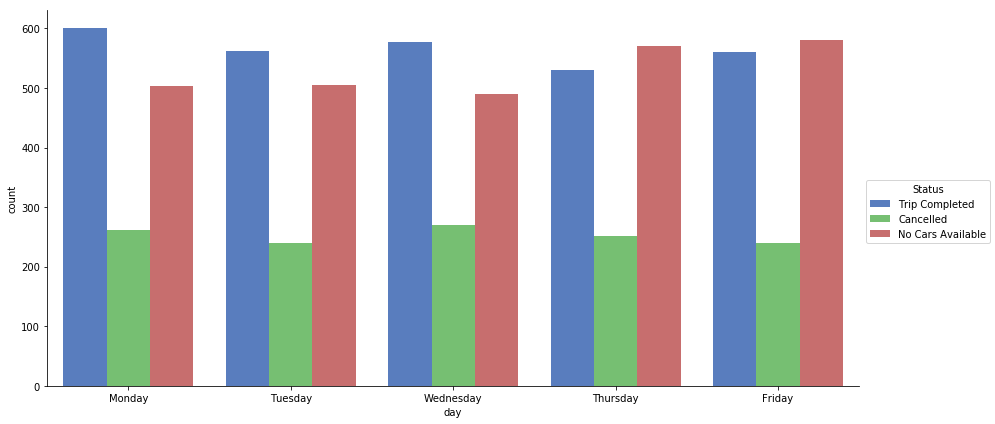

In [35]:
g = sns.factorplot("day", data=uber_df, hue= 'Status', kind="count", size=6, aspect=2, palette="muted")

##### Day Wise Status Count Comparison
##### All the Days more or less seem to be uniform in Supply-Demand

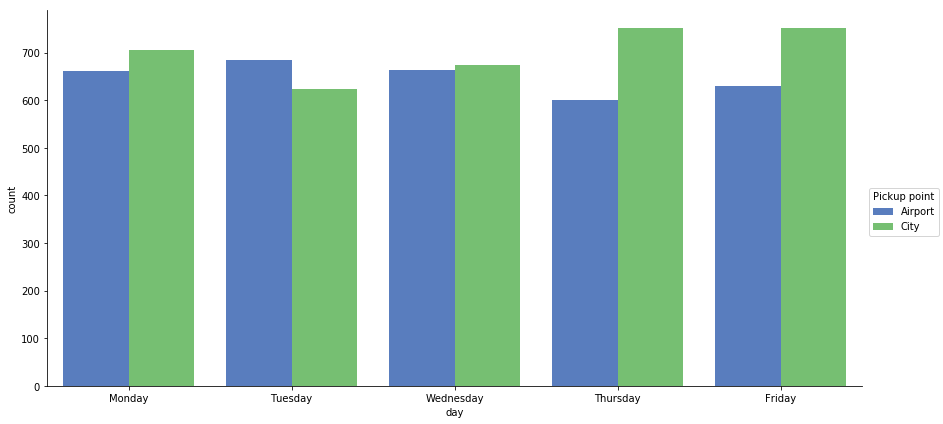

In [36]:
g = sns.factorplot("day", data=uber_df, hue= 'Pickup point', kind="count", size=6, aspect=2, palette="muted")

##### Day-Pickuppoint Count Comparison

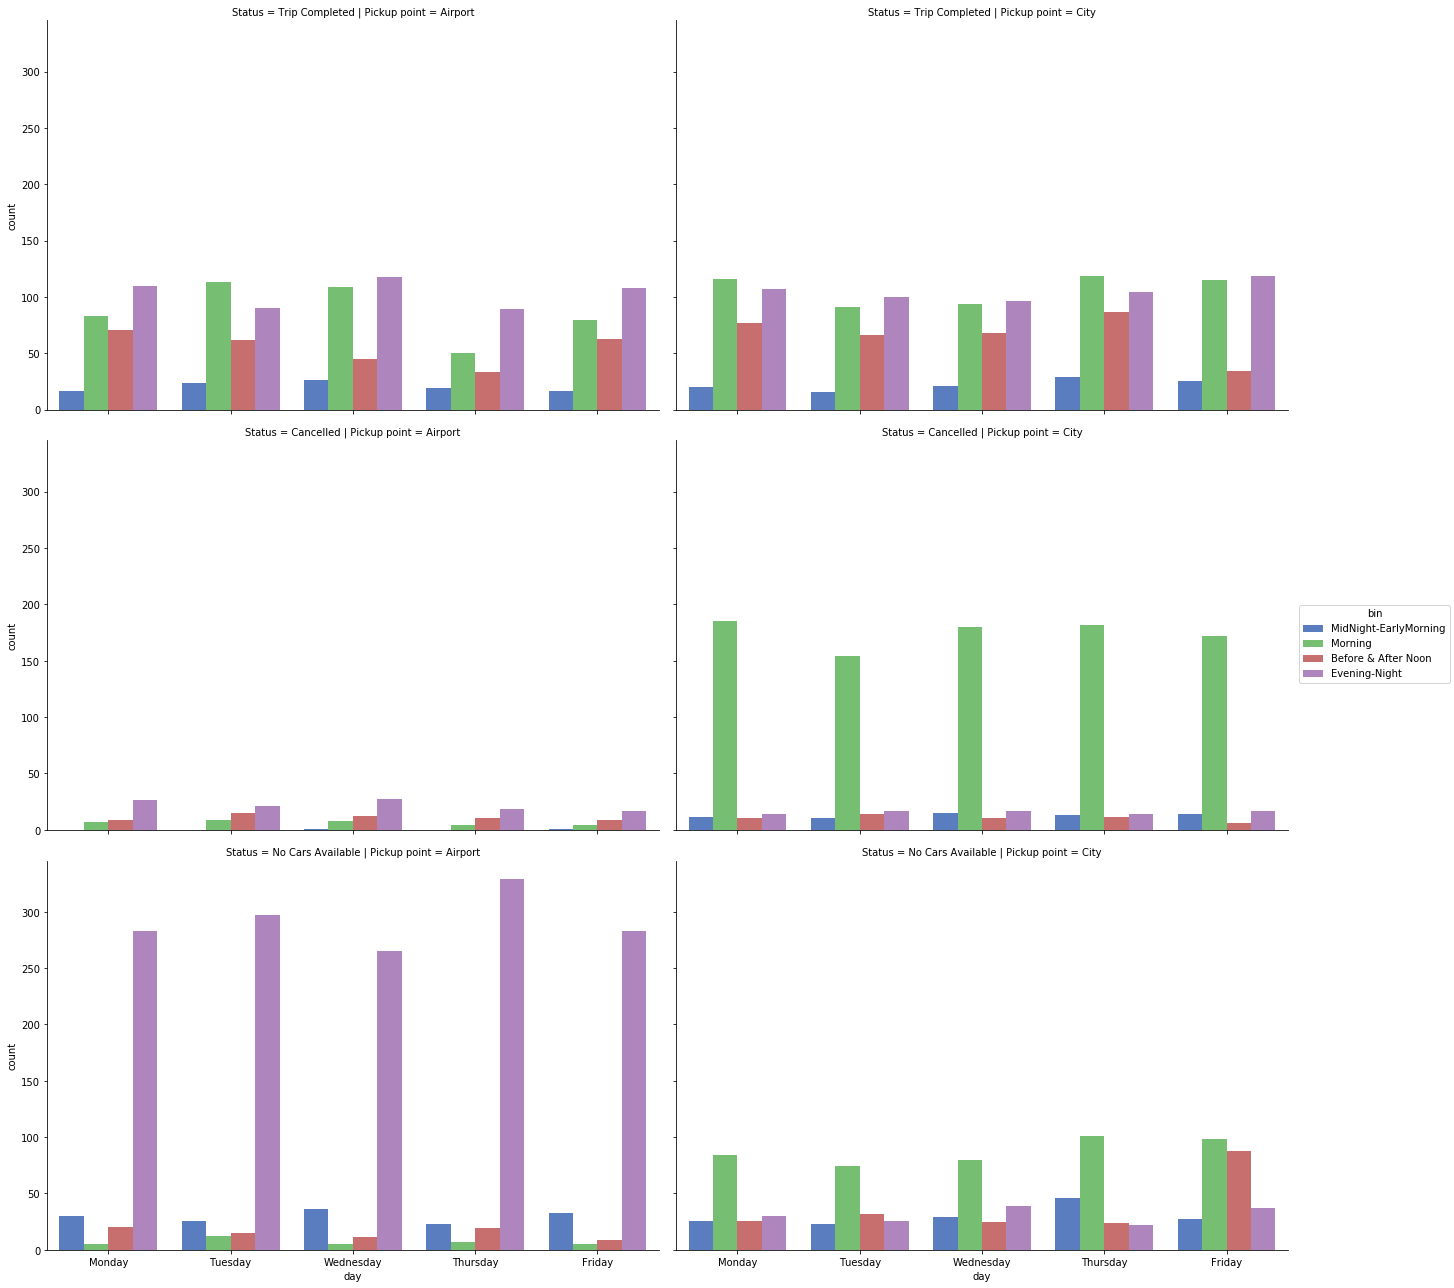

In [37]:
g = sns.factorplot("day", data=uber_df, hue= 'bin', row = 'Status', col = 'Pickup point', kind="count", size=6, aspect=1.5, palette="muted")

#####  Day - bin - Status - Pickup point Analysis
##### All the days followed similar pattern - Nothing interesting found!

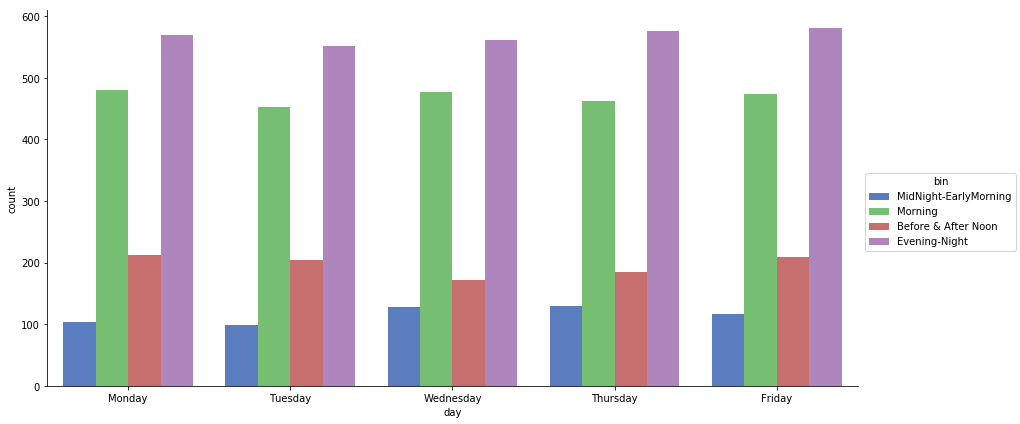

In [38]:
g = sns.factorplot("day", data=uber_df, hue= 'bin', kind="count", size=6, aspect=2, palette="muted")

##### Not Significant but just an observation:
##### Monday, Thursday, Friday - More number of requests from City to go to Airport
##### Thursday, Friday - Less number of requests from Airport to go to City

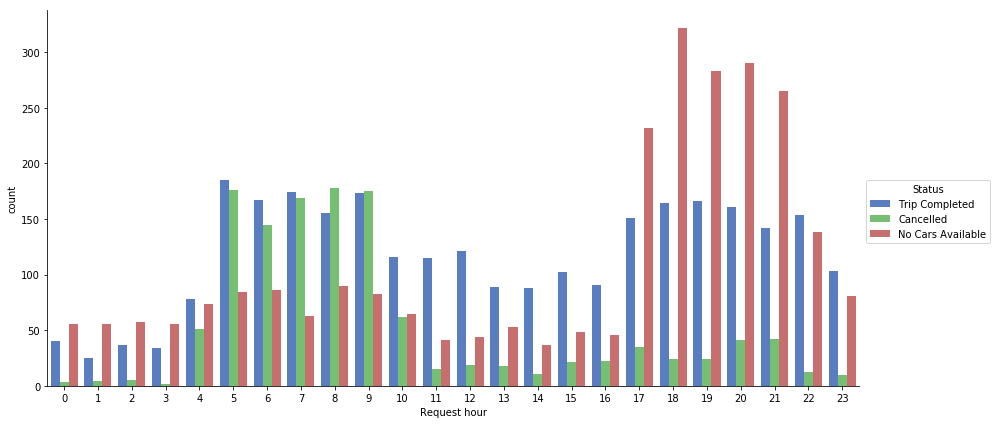

In [39]:
#plt.figure(figsize=(10, 10))
#uber_df.groupby('Request hour').Status.count().plot(kind='bar', width=0.25)
g = sns.factorplot("Request hour", data=uber_df, hue= 'Status', kind="count", size=6, aspect=2, palette="muted")

##### Hourly Analysis of the Status